In [1]:
#importing the libraries
import numpy as np                #for working with arrays
import matplotlib.pyplot as plt   #for working with graphs
import pandas as pd               #for working with dataframes

%matplotlib inline                
#to enable plotting graphs in jupyter nb

In [2]:
#reading the CSV file in pandas dataframe
dataset = pd.read_csv('kmeans_dataset.csv')

In [3]:
dataset.head()

,Hardwork,Skills,Label
0,1.483358,6.135020,C Tier
1,52.864104,48.897037,B Tier
2,67.556683,19.359183,D Tier
3,52.797684,43.650076,B Tier
4,45.060080,74.978268,B Tier


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hardwork,460.0,47.019178,24.895360,0.712341,25.287181,48.519039,67.467031,97.618528
Skills,460.0,38.439590,26.136017,1.447058,13.987334,38.515372,60.161463,95.704652


In [5]:
mydata=dataset.drop('Label', axis =1)
mydata.dropna(subset=['Hardwork'], inplace = True)
mydata.dropna(subset=['Skills'], inplace = True)
for x in mydata.index:
  if mydata.loc[x, "Hardwork"] > 100:
    mydata.drop(x, inplace = True)
for x in mydata.index:
  if mydata.loc[x, "Skills"] > 100:
    mydata.drop(x, inplace = True)
mydata.head()

,Hardwork,Skills
0,1.483358,6.135020
1,52.864104,48.897037
2,67.556683,19.359183
3,52.797684,43.650076
4,45.060080,74.978268


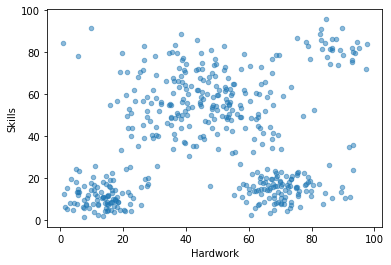

In [6]:
mydata.plot(kind = 'scatter', x = 'Hardwork', y = 'Skills', alpha =0.5)
plt.show()

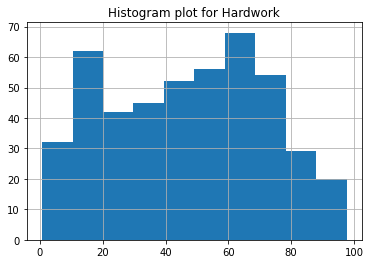

In [7]:
mydata.Hardwork.hist()
plt.title('Histogram plot for Hardwork')
plt.show()

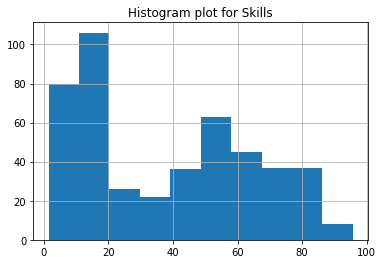

In [8]:
mydata.Skills.hist()
plt.title('Histogram plot for Skills')
plt.show()

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 459
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hardwork  460 non-null    float64
 1   Skills    460 non-null    float64
dtypes: float64(2)
memory usage: 30.8 KB


In [10]:
mydata.corr()

,Hardwork,Skills
Hardwork,1.000000,0.231967
Skills,0.231967,1.000000


In [11]:
mydata.drop_duplicates(inplace=True)
print("No. of duplicated values: ",mydata.duplicated().sum())

No. of duplicated values:  0


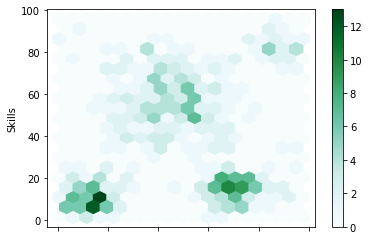

In [12]:
mydata.plot.hexbin(x='Hardwork', y='Skills', gridsize=18)
plt.show()

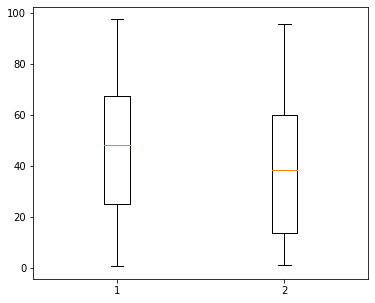

In [13]:
fig = plt.figure(figsize =(6, 5))
plt.boxplot(mydata)
plt.show()

In [14]:
X = dataset.iloc[:, [0, 1]].values

In [15]:
m=X.shape[0]
n=X.shape[1]
n_iter=50

In [16]:
from myKMeans import myKMeans

In [17]:
#to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=myKMeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

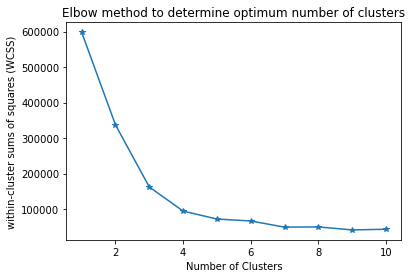

In [18]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array,'*-')
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [19]:
#based on these observations we choose 4 as optimum number of clusters
K=4

In [20]:
kmeans=myKMeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

In [21]:
Centroids

array([[41.98601515, 57.848104  ],
       [13.92573372, 11.98141106],
       [81.35989223, 77.58745049],
       [70.22047796, 17.31333394]])

In [22]:
centroid_df = pd.DataFrame(Centroids, columns = ['Hardwork','Skills'])
centroid_df


,Hardwork,Skills
0,41.986015,57.848104
1,13.925734,11.981411
2,81.359892,77.587450
3,70.220478,17.313334


In [23]:
data_arr=np.array(mydata)
len(data_arr)

460

In [24]:
dataset["Cluster"]=-1

for k in range(K):
    for i in range(len(Output[k+1])):
        for j in range(len(data_arr)):
            if((Output[k+1][i][0]==data_arr[j][0])and(Output[k+1][i][1]==data_arr[j][1])):
                dataset.at[j, 'Cluster'] = k+1
                break
                              

In [25]:
dataset.head(10)

,Hardwork,Skills,Label,Cluster
0,1.483358,6.135020,C Tier,2
1,52.864104,48.897037,B Tier,1
2,67.556683,19.359183,D Tier,4
3,52.797684,43.650076,B Tier,1
4,45.060080,74.978268,B Tier,1
5,85.878406,74.316613,A Tier,3
6,38.591416,65.673801,B Tier,1
7,23.826756,56.802663,B Tier,1
8,45.512333,57.864564,B Tier,1
9,44.871919,58.850939,B Tier,1


In [26]:
dataset_arr=np.array(dataset)

In [27]:
key=[dataset_arr[5][3],dataset_arr[1][3],dataset_arr[0][3],dataset_arr[2][3]]
key

[3, 1, 2, 4]

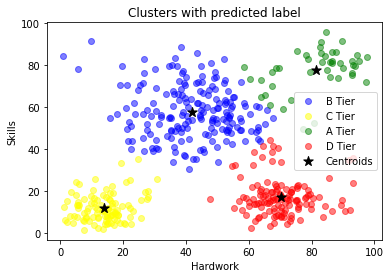

In [28]:
color=['green','blue','yellow','red']
labels=['A Tier','B Tier','C Tier','D Tier']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[key.index(k+1)], alpha=0.5,label=labels[key.index(k+1)])
plt.scatter(Centroids[:,0],Centroids[:,1],marker='*',c='black',s=100,label='Centroids')
plt.title('Clusters with predicted label')
plt.xlabel('Hardwork')
plt.ylabel('Skills')
plt.legend()
plt.show()


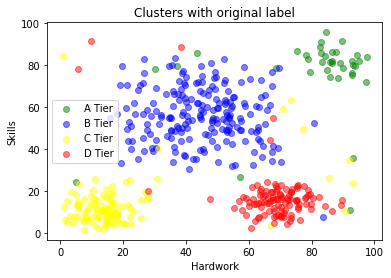

In [29]:
df1=dataset[dataset.Label=='A Tier']
df2=dataset[dataset.Label=='B Tier']
df3=dataset[dataset.Label=='C Tier']
df4=dataset[dataset.Label=='D Tier']

plt.scatter(df1.Hardwork,df1.Skills,color ='green',alpha=0.5,label='A Tier')
plt.scatter(df2.Hardwork,df2.Skills,color ='blue',alpha=0.5,label='B Tier')
plt.scatter(df3.Hardwork,df3.Skills,color ='yellow',alpha=0.5,label='C Tier')
plt.scatter(df4.Hardwork,df4.Skills,color ='red',alpha=0.5,label='D Tier')

plt.title('Clusters with original label')
plt.xlabel('Hardwork')
plt.ylabel('Skills')
plt.legend()
plt.show()

In [30]:
incorr=pd.DataFrame(columns=['Hardwork','Skills','Label','KMLabel'])
for i in range(len(dataset_arr)):
    if((dataset_arr[i][2]=='B Tier')and(dataset_arr[i][3]!=key[1])):
        incorr.loc[len(incorr)] = dataset_arr[i]
    if((dataset_arr[i][2]=='D Tier')and(dataset_arr[i][3]!=key[3])):
        incorr.loc[len(incorr)] = dataset_arr[i]
    if((dataset_arr[i][2]=='A Tier')and(dataset_arr[i][3]!=key[0])):
        incorr.loc[len(incorr)] = dataset_arr[i]
    if((dataset_arr[i][2]=='C Tier')and(dataset_arr[i][3]!=key[2])):
        incorr.loc[len(incorr)] = dataset_arr[i]

print("Number of incorrect predictions:",len(incorr))
incorr.head()

Number of incorrect predictions: 46


,Hardwork,Skills,Label,KMLabel
0,73.388526,63.599132,C Tier,3
1,90.632872,10.366696,C Tier,4
2,24.867728,35.371319,B Tier,2
3,67.466664,76.972594,B Tier,3
4,28.029849,20.104359,D Tier,2


In [31]:
corr=pd.DataFrame(columns=['Hardwork','Skills','Label','KMLabel'])
for i in range(len(dataset_arr)):
    if((dataset_arr[i][2]=='B Tier')and(dataset_arr[i][3]==key[1])):
        corr.loc[len(corr)] = dataset_arr[i]
    if((dataset_arr[i][2]=='D Tier')and(dataset_arr[i][3]==key[3])):
        corr.loc[len(corr)] = dataset_arr[i]
    if((dataset_arr[i][2]=='A Tier')and(dataset_arr[i][3]==key[0])):
        corr.loc[len(corr)] = dataset_arr[i]
    if((dataset_arr[i][2]=='C Tier')and(dataset_arr[i][3]==key[2])):
        corr.loc[len(corr)] = dataset_arr[i]
corr


,Hardwork,Skills,Label,KMLabel
0,1.483358,6.135020,C Tier,2
1,52.864104,48.897037,B Tier,1
2,67.556683,19.359183,D Tier,4
3,52.797684,43.650076,B Tier,1
4,45.060080,74.978268,B Tier,1
...,...,...,...,...
409,48.414533,53.807818,B Tier,1
410,49.534222,54.425778,B Tier,1
411,30.457458,40.396009,B Tier,1
412,2.277720,5.085407,C Tier,2


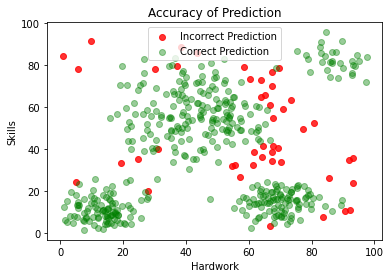

In [32]:
plt.scatter(incorr.Hardwork,incorr.Skills,color='red',alpha=0.8,label='Incorrect Prediction')
plt.scatter(corr.Hardwork,corr.Skills,color='green',alpha=0.4,label='Correct Prediction')
plt.title('Accuracy of Prediction')
plt.xlabel('Hardwork')
plt.ylabel('Skills')
plt.legend()
plt.show()

In [33]:
AccTot=(len(corr)/(len(corr)+len(incorr)))*100
AccA=(len(corr[corr.Label=='A Tier'])/len(dataset[dataset.Label=='A Tier']))*100
AccB=(len(corr[corr.Label=='B Tier'])/len(dataset[dataset.Label=='B Tier']))*100
AccC=(len(corr[corr.Label=='C Tier'])/len(dataset[dataset.Label=='C Tier']))*100
AccD=(len(corr[corr.Label=='D Tier'])/len(dataset[dataset.Label=='D Tier']))*100
print("Accuracy of Clustering: ",AccTot,"%")

Accuracy of Clustering:  90.0 %


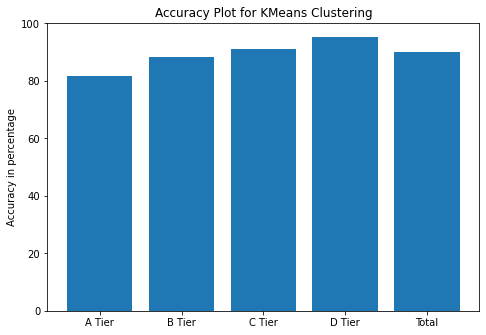

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Accuracy = ['A Tier', 'B Tier', 'C Tier', 'D Tier', 'Total']
Values = [AccA,AccB,AccC,AccD,AccTot]
plt.bar(Accuracy,Values)
plt.title('Accuracy Plot for KMeans Clustering')
plt.ylabel('Accuracy in percentage')
plt.show()

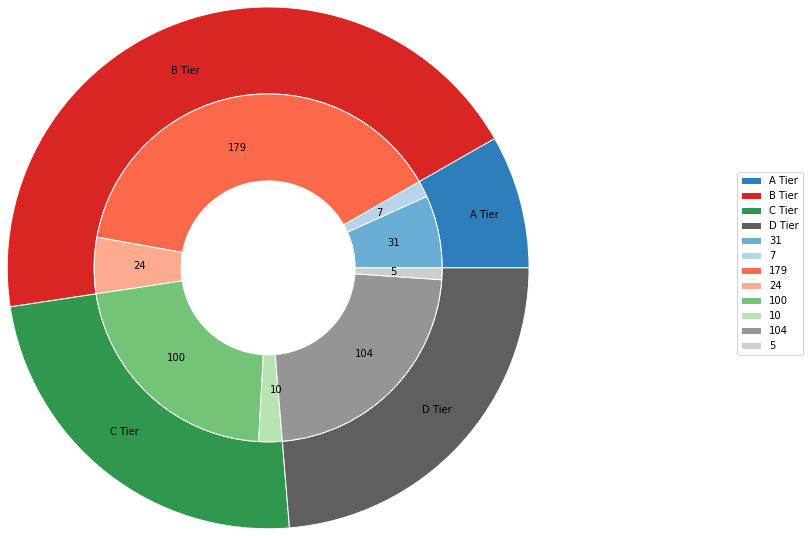

In [35]:
group_names=['A Tier','B Tier','C Tier','D Tier']
group_size=[len(dataset[dataset.Label=='A Tier']),len(dataset[dataset.Label=='B Tier']),
           len(dataset[dataset.Label=='C Tier']),len(dataset[dataset.Label=='D Tier'])]
subgroup_names=[len(corr[corr.Label=='A Tier']),len(incorr[incorr.Label=='A Tier']),len(corr[corr.Label=='B Tier']),
              len(incorr[incorr.Label=='B Tier']),len(corr[corr.Label=='C Tier']),len(incorr[incorr.Label=='C Tier']),
              len(corr[corr.Label=='D Tier']),len(incorr[incorr.Label=='D Tier'])]
subgroup_size=[len(corr[corr.Label=='A Tier']),len(incorr[incorr.Label=='A Tier']),len(corr[corr.Label=='B Tier']),
              len(incorr[incorr.Label=='B Tier']),len(corr[corr.Label=='C Tier']),len(incorr[incorr.Label=='C Tier']),
              len(corr[corr.Label=='D Tier']),len(incorr[incorr.Label=='D Tier'])]
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3, labels=group_names,labeldistance=0.8, colors= 
[a(0.7), b(0.7), c(0.7), d(0.7)] )
plt.setp( mypie, width=1, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.5-0.5, 
labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.3), b(0.5), b(0.3), c(0.5), c(0.3), d(0.5), d(0.3)])
plt.setp( mypie2, width=1, edgecolor='white')
plt.margins(0,0)

plt.legend(loc=(1.9, 0.1))
plt.show()

